# Анализ убытков приложения ProcrastinatePRO+

**Цель проекта:**

   Разобраться в причинах почему, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки и помочь компании выйти в плюс.

**Описание проекта:**

   Проведен исследовательский анализ данных (анализ пользователей в разрезе стран, устройств, рекламных каналов), рассчитаны метрики, использован когортный анализ. Применены написанные ранее функции расчета метрик. Проведен анализ расходов на маркетинг, оценка окупаемости рекламы. Выявлены убыточные рекламные каналы, даны рекомендации по инвестициям в каналы, которые являются перспективным с точки зрения окупаемости и уровня удержания пользователей.

**План работы:**
    
1. Загрузка данных и подготовка их к анализу
2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии
3.Исследовательский анализ данных:
- профили пользователей, минимальная и максимальная даты привлечения
- таблица, отражающая количество пользователей и долю платящих из каждой страны
- таблица, отражающая количество пользователей и долю платящих по каждому устройству
- таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения
4. Исследование расходов на маркетинг
- общая сумма расходов на маркетингъ
- исследование, сколько денег потрачено на каждый рекламный источник
- Визуализация динамики изменения расходов во времени (по неделям) по каждому источнику
- Визуализация динамики изменения расходов во времени (по месяцам) по каждому источнику
- Определение средней стоимости привлечения одного пользователя (CAC) из каждого источника
5. Оценка окупаемости рекламы
- Анализ окупаемости рекламы с помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI
- Анализ конверсии пользователей, динамики ее изменения
- Анализ удержания пользователей и динамики ее изменения
- Анализ окупаемости рекламы с разбивкой по устройствам
- Анализ окупаемости рекламы с разбивкой по странам
- Анализ окупаемости рекламы с разбивкой по рекламным каналам
6. Общий вывод по проекту

## Загрузка данных и подготовка их к анализу

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#загружаем файл о визитах в переменную visits
visits = pd.read_csv('/datasets/visits_info_short.csv')
#загружаем файл о заказах в переменную orders
orders = pd.read_csv('/datasets/orders_info_short.csv')
#загружаем файл о рекламных расходах в переменную costs
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#создаем функцию для выполнения предобработки данных
def preprocesing(df):
    #выводим на экран сводную информацию о таблице
    print('Сводная информация о таблице:')
    print(df.info())
    print()
    #выводим на экран уникальные значения столбцов датафрейма
    columns = list(df)
    for i in columns:
        print(f'Уникальные значения столбца {i}:')
        print(df[i].unique())
        print()
    #выводим на экран количество пропущенных значений в таблице
    print('Количество пропущенных значений в таблице:')    
    print(df.isna().sum())
    print()
    #выводим на экран количество дубликатов в таблице
    print('Количество дубликатов в таблице:', df.duplicated().sum())
    print()
    #выводим на экран первые пять строк датафрейма
    print('Вывод первых пяти строк на экран:')
    print(df.head())      

In [4]:
#вызываем функцию preprocesing для датафрейма visits
preprocesing(visits)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Уникальные значения столбца User Id:
[981449118918 278965908054 590706206550 ... 519022174024 354394066496
 279181973476]

Уникальные значения столбца Region:
['United States' 'UK' 'France' 'Germany']

Уникальные значения столбца Device:
['iPhone' 'Mac' 'Android' 'PC']

Уникальные значения столбца Channel:
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambda

In [5]:
#вызываем функцию preprocesing для датафрейма orders
preprocesing(orders)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Уникальные значения столбца User Id:
[188246423999 174361394180 529610067795 ... 492983055500 651604369137
 168548862926]

Уникальные значения столбца Event Dt:
['2019-05-01 23:09:52' '2019-05-01 12:24:04' '2019-05-01 11:34:04' ...
 '2019-10-31 06:17:29' '2019-10-31 22:46:19' '2019-10-31 13:29:06']

Уникальные значения столбца Revenue:
[ 4.99  5.99  9.99 49.99 19.99]

Количество пропущенных значений в таблице:
User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество дубликатов в таблице: 0

Вывод первых пяти строк на экран:
        User Id             Event Dt  Revenue
0  18824642

In [6]:
#вызываем функцию preprocesing для датафрейма costs
preprocesing(costs)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Уникальные значения столбца dt:
['2019-05-01' '2019-05-02' '2019-05-03' '2019-05-04' '2019-05-05'
 '2019-05-06' '2019-05-07' '2019-05-08' '2019-05-09' '2019-05-10'
 '2019-05-11' '2019-05-12' '2019-05-13' '2019-05-14' '2019-05-15'
 '2019-05-16' '2019-05-17' '2019-05-18' '2019-05-19' '2019-05-20'
 '2019-05-21' '2019-05-22' '2019-05-23' '2019-05-24' '2019-05-25'
 '2019-05-26' '2019-05-27' '2019-05-28' '2019-05-29' '2019-05-30'
 '2019-05-31' '2019-06-01' '2019-06-02' '2019-06-03' '2019-06-04'
 '2019-06-05' '2019-06-06' '2019-06-07' '2019-06-08' '2019-06-09'
 '2019-06-10' '2019-06-11' '2019-06-12' '2019-06-13' '2

In [7]:
#преобразование данных о времени в датафрейме visits
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

In [8]:
#преобразование данных о времени в датафрейме orders
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [9]:
#преобразование данных о времени в датафрейме costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Выводы по п.1:**

 Датасет visits содержит информацию о посещениях сайта и включает в себя 309901 строку. У всех столбцов, кроме столбца User Id, тип данных object. Столбец User Id имеет тип данных int.
 Датасет orders содержит информацию о заказах и включает в себя 40212 строк. Столбец Event Dt имеет тип данных object, столбец Revenue - тип float, столбец User Id - тип int.
 Датасет costs содержит информацию о расходах на рекламу и включает в себя 1800 строк. Столбцы dt и Channel имеют тип данных object, а столбец costs - тип float. 
 
Предобработка данных показала, что в датасетах нет дубликатов и пропущенных значений, но столбцы, содержащие дату и время, имеют тип данных object. Поскольку это затруднит дальнейшее проведение анализа, столбцы Session Start, Session End, Event Dt, dt преобразованы в формат даты и времени.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей

In [10]:
#функция для создания пользовательских профилей
def get_profiles(visists, orders, costs):
    
    #находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
        {
            'Session Start' : 'first',
            'Channel' : 'first',
            'Device' : 'first',
            'Region' : 'first',
        }
        )
        .rename(columns={'Session Start' : 'first_ts'})
        .reset_index()
    )
    
    #для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    #добавляем признак платящих пользователей
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())
    
    #считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
    profiles.groupby(['dt', 'Channel'])
    .agg({'User Id' : 'nunique'})
    .rename(columns={'User Id' : 'unique_users'})
    .reset_index()
    )
    
    #объединяем траты на рекламу и число привлеченных пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'Channel'], how='left')
    
    #делим рекламные расходы на число привлеченных пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    #добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
    how='left',
    )
    
    #стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

### Функция для расчета удержания

In [11]:
#функция для расчета удержания
def get_retention(
    profiles,
    visits,
    observation_date,
    horison_days,
    dimensions=[],
    ignore_horizon=False,
    ):
    
    #добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    #исключаем пользователей, не "доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horison_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #собираем "сырые" данные для расчета удержания
    result_raw = result_raw.merge(
    visits[['User Id', 'Session Start']], on='User Id', how='left'
    )
    
    result_raw['lifetime'] = (
    result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days
    
    #функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
        index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
        df.groupby(dims)
        .agg({'User Id' : 'nunique'})
        .rename(columns={'User Id' : 'cohort_size'})
        )
       
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    #получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    #получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time        

### Функция для расчета конверсии

In [12]:
#функция для расчета конверсии
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    #исключаем пользователей, не "доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #определяем дату и время первой покупки для каждого пользователя
    first_purchases =(
        orders.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt' : 'first'})
        .reset_index()
    )
        
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['User Id', 'Event Dt']], on='User Id', how='left')
    
    #рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['Event Dt'] - result_raw['first_ts']).dt.days
    
    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort']='All users'
        dimensions=dimensions+['cohort']
        
        #функция для группировки таблицы по желаемым признакам
        def group_by_dimensions(df, dims, horizon_days):
            result = df.pivot_table(index=dims, columns='lifetime', values='User Id', aggfunc='nunique')
            result = result.fillna(0).cumsum(axis=1)
            cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id' : 'nunique'})
            .rename(columns={'User Id' : 'cohort_size'})
            )
            result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
            #делим каждую "ячейку" в строке на размер когорты
            #и получаем conversion_rate
            result = result.div(result['cohort_size'], axis=0)
            result = result[['cohort_size'] + list(range(horizon_days))]
            result['cohort_size'] = cohort_sizes
            return result
        
        #получаем таблицу конверсии
        result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
        
        #для таблицы динамики конверсии убираем 'cohort' из dimensions
        if 'cohort' in dimensions:
            dimensions=[]
            
        #получаем таблицу динамики конверсии
        result_in_time = group_by_dimensions(result_raw, dimensions+ ['dt'], horizon_days)
        
        #возвращаем обе таблицы и сырые данные
        return result_raw, result_grouped, result_in_time            

### Функция для расчета LTV и ROI

In [13]:
#функция для расчета LTV и ROI
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    #исключаем пользователей, не "доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(orders[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left')
    
    #рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['Event Dt'] - result_raw['first_ts']).dt.days
    
    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    #функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        #строим "треугольгную" таблицу выручки  
        result = df.pivot_table(index=dims, columns='lifetime', values='Revenue', aggfunc='sum')
        
        #находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        #вычисляем размеры когорт
        cohort_sizes = (
        df.groupby(dims)
        .agg({'User Id' : 'nunique'})
        .rename(columns={'User Id' : 'cohort_size'})
        )
        #объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        #считаем LTV: делим каждую ячейку в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        #исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        #восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        #собираем датафрейм с данными пользователей и значениями CAC,
        #добавляя параметры из dimensions
        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()
        
        #считаем средний САС по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost' : 'mean'})
            .rename(columns={'acquisition_cost' : 'cac'})
        )
        
        #считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        
        #удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        #восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        
        #добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        
        #в финальной таблице оставляем размеры когорт, CAC
        #и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        #возвращаем таблицы LTV и ROI
        return result, roi
    
    #получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    #для таблиц динамики убираем cohort из dimensions
    if 'cohort' in dimensions:
        dimensions=[]
        
    #получаем таблицы динамики  LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return (
    result_raw,#сырые данные
    result_grouped,#таблица LTV
    result_in_time,#таблица динамики LTV
    roi_grouped,# таблица ROI
    roi_in_time,#таблица динамики ROI
    )
        

### Функция для сглаживания фрейма

In [14]:
#функция для сглаживания фрейма
def filter_data(df, window):
    #для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### Функция для визуализации удержания

In [15]:
#функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):
    
    #задаем размер сетки для графиков
    plt.figure(figsize=(15,10))
    
    #исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    #в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #если в индексах таблицы удержания только payer,
    #добавляем второй признак - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort','payer'])
        
    #в таблице графиков - два столбца и две строки, четыре ячейки
    #в первой строим кривые удержания платящих пользователей
    ax1=plt.subplot(2,2,1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    #во второй ячейке строим кривые удержания неплатящих
    #вертикальная ось - от графика из первой ячейки
    ax2 = plt.subplot(2,2,2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    #в третьей ячейке - динамика удержания платящих
    ax3 = plt.subplot(2,2,3)
    #получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ] 
    
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(index='dt', columns=columns,\
                                                                         values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    
    #в четвертой ячейке - динамика удержания неплатящих
    ax4 = plt.subplot(2,2,4, sharey=ax3)
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [16]:
#функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    #задаем размер сетки для графиков
    plt.figure(figsize=(15,5))
    
    #исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    #в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #первый график - кривые конверсии
    ax1 = plt.subplot(1,2,1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    #второй график - динамика конверсии
    ax2=plt.subplot(1,2,2, sharey=ax1)
    columns = [
        #столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    
    filtered_data = conversion_history.pivot_table(
    index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()   
    

### Функция для визуализации LTV  и ROI

In [17]:
#функция для визуализации LTV  и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    #задаем сетку отрисовки графиков
    plt.figure(figsize=(20,10))
    
    #из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    #из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    #в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    
    #первый график - кривые ltv
    ax1 = plt.subplot(2,3,1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    #второй график - динамика ltv
    ax2 = plt.subplot(2,3,2, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns=[name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    #третий график - динамика cac
    ax3 = plt.subplot(2,3,3, sharey=ax1)
     #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns=[name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    #четвертый график - кривые roi
    ax4 = plt.subplot(2,3,4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    #пятый график - динамика roi
    ax5 = plt.subplot(2,3,5, sharey=ax4)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns=[name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()   
    

## Исследовательский анализ данных

### Профили пользователей, минимальная и максимальная даты привлечения

In [18]:
#преобразование данных о времени в столбце costs['dt']
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
#создаем профили пользователей
profiles = get_profiles(visits, orders, costs)
#определяем и выводим на экран минимальную дату привлечения
min_analysis_date = profiles['dt'].min()
display('Минимальная дата привлечения пользователей:', min_analysis_date)
#определяем и выводим на экран максимальную дату привлечения
max_analysis_date = profiles['dt'].max()
display('Максимальная дата привлечения пользователей:', max_analysis_date)
#выводим первые 5 строк профилей пользователей на экран
print(profiles.head())

'Минимальная дата привлечения пользователей:'

datetime.date(2019, 5, 1)

'Максимальная дата привлечения пользователей:'

datetime.date(2019, 10, 27)

    User Id            first_ts     Channel  Device         Region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


**Выводы по п.3.1.:**

Профили пользователей составлены. Минимальная дата привлечения - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года.    

### Таблица, отражающая количество пользователей и долю платящих из каждой страны

In [19]:
#создаем функцию, которая строит таблицу, отражающую количество пользователей и долю платящих
#в разбивке по определенным признакам
def grouped_dimensions(dims):
    result = profiles.groupby(dims).agg({'User Id' : 'count', 'payer' : 'mean'})\
    .sort_values(by='payer', ascending=False)\
    .reset_index()
    return round(result, 3)

In [20]:
#вызываем функцию grouped_dimensions по признаку Region
grouped_dimensions('Region')

,Region,User Id,payer
0,United States,100002,0.069
1,Germany,14981,0.041
2,UK,17575,0.040
3,France,17450,0.038


**Выводы по п.3.2.:**
    
Анализ показал, что пользователи приходят в приложение из следующих стран: США, Великобритания, Франция и Германия. При этом количество пользователей из США значительно превышает количество пользователей из других стран (100002 чел.).

И доля платящих пользователей из США больше, чем из других стран (0.069).  

### Таблица, отражающая количество пользователей и долю платящих для каждого устройства

In [21]:
#вызываем функцию grouped_dimensions по признаку Device
grouped_dimensions('Device')

,Device,User Id,payer
0,Mac,30042,0.064
1,iPhone,54479,0.062
2,Android,35032,0.059
3,PC,30455,0.050


**Выводы по п.3.3.:**
    
Анализ показал, что пользователи приложения пользуются устройствами iPhone, Android, PC, Mac. При этом количество пользователей с устройствами iPhone наибольшее (54479 чел.), наименьшее же количество пользователей с устройствами Mac (30042 чел.).

Но следует отметить, что доля платящих пользователей больше у использующих устройства Mac(0.064). При этом частота использования iPhone у платящих пользователей тоже высока (0.062).   

### Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения

In [22]:
#вызываем функцию grouped_dimensions по признаку Channel
grouped_dimensions('Channel')

,Channel,User Id,payer
0,FaceBoom,29144,0.122
1,AdNonSense,3880,0.113
2,lambdaMediaAds,2149,0.105
3,TipTop,19561,0.096
4,RocketSuperAds,4448,0.079
5,WahooNetBanner,8553,0.053
6,YRabbit,4312,0.038
7,MediaTornado,4364,0.036
8,LeapBob,8553,0.031
9,OppleCreativeMedia,8605,0.027


**Выводы по п.3.4.:**
    
Анализ рекламных источников привлечения показал, что больше всего пользователей являются органическими, то есть пришли в приложение самостоятельно, не используя никакие рекламные источники (56439 чел.). Также достаточно много пользователей пришли из источников FaceBoom (29144 чел.) и TipTop(19561 чел.).

Что касается платящих пользователей,то чаще всего они приходили через канал FaceBoom (0.122) и AdNonSense (0.113).


**Общий вывод по пункту 3:**


Профили пользователей составлены. Минимальная дата привлечения - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года.    

Анализ показал, что пользователи приходят в приложение из следующих стран: США, Великобритания, Франция и Германия. При этом количество пользователей из США значительно превышает количество пользователей из других стран (100002 чел.).
И доля платящих пользователей из США больше, чем из других стран (0.069).  

Анализ показал, что пользователи приложения пользуются устройствами iPhone, Android, PC, Mac. При этом количество пользователей с устройствами iPhone наибольшее (54479 чел.), наименьшее же количество пользователей с устройствами Mac (30042 чел.).
Но следует отметить, что доля платящих пользователей больше у использующих устройства Mac(0.064). При этом частота использования iPhone у платящих пользователей тоже высока (0.062). 

Анализ рекламных источников привлечения показал, что больше всего пользователей являются органическими, то есть пришли в приложение самостоятельно, не используя никакие рекламные источники (56439 чел.). Также достаточно много пользователей пришли из источников FaceBoom (29144 чел.) и TipTop(19561 чел.).
Что касается платящих пользователей,то чаще всего они приходили через канал FaceBoom (0.122) и AdNonSense (0.113).

## Исследование расходов на маркетинг

### Общая сумма расходов на маркетинг

In [23]:
#считаем и выводим на экран общую сумму расходов на маркетинг
display('Общая сумма расходов на маркетинг:', round(costs['costs'].sum(), 2))

'Общая сумма расходов на маркетинг:'

105497.3

**Выводы по п.4.1.:**

Общая сумма расходов на маркетинг составила 105 497.30 руб.

### Исследование, сколько денег потрачено на каждый рекламный источник

In [24]:
#строим и выводим на экран таблицу, отражающую распределение трат по рекламным источникам
display(costs.groupby('Channel')[['costs']].sum().sort_values(by='costs', ascending=False).reset_index())

,Channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


**Выводы по п.4.2.:**

Исследование показало, что больше всего денежных средств потрачено на рекламный канал TipTop (54751.30 руб.) и FaceBoom (32445.60 руб.), что принесло свои результаты в виде большей доли платящих пользователей, пришедших из этих каналов. Меньше всего денежных средств потрачено на рекламные источники MediaTornado(954.48 руб.) и YRabbit(944.22 руб.).

### Визуализация динамики изменения расходов во времени (по неделям) по каждому источнику

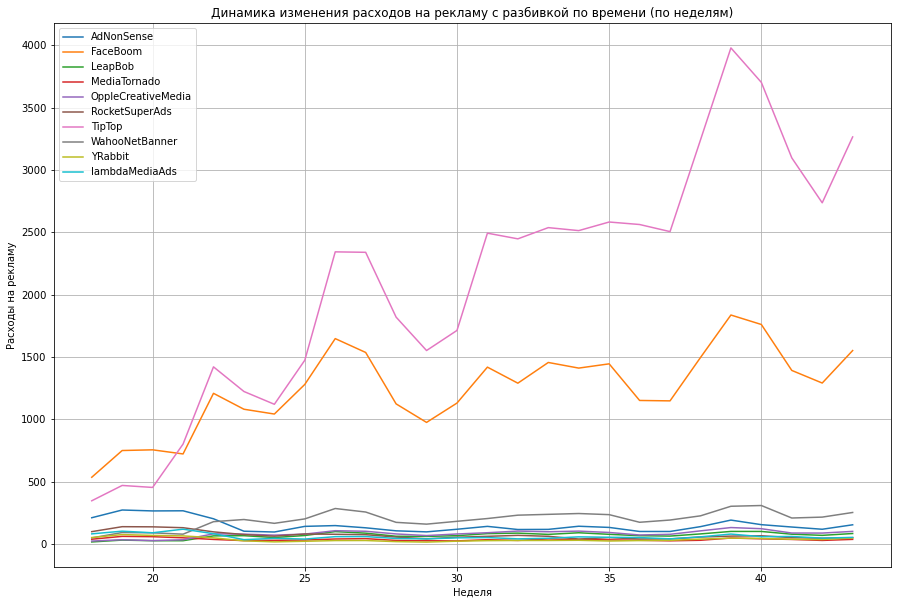

In [25]:
# преобразование времени в столбце costs['dt']
costs['dt'] = pd.to_datetime(costs['dt'])
#выделяем номер недели из столбца costs['dt']
costs['week'] = costs['dt'].dt.isocalendar().week
#строим график, где по оси х - недели, по оси y - сумма расходов, каждая линия - один рекламный источник 
costs_week = costs.pivot_table(index='week', columns='Channel', values='costs', aggfunc='sum')\
.plot(grid=True, figsize=(15,10))
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов на рекламу с разбивкой по времени (по неделям)')
plt.show();     

**Выводы по п.4.3.:**
    
    График динамики изменения расходов на рекламу по неделям отражает достаточно стабильное увеличение расходов на рекламу по каналам TipTop и FaceBoom, кривая с увеличением времени стабильно растет. В FaceBoom с течением времени было вложено больше денежных средств. Резкие скачки вверх на графике, в районе 26 и 39 недели, говорят о том, что в этот период было значительное вливание денежных средств на рекламу этих двух каналов. Но к 42 неделе расходы на рекламу резко снизились, с дальнейшим увеличением.
           
    Линии на графике по остальным каналам практически не отражают увеличения расходов на рекламу по этим каналам, то есть с момента начала до окончания анализа расходы на рекламу примерно одинаковы.

### Визуализация динамики изменения расходов во времени (по месяцам) по каждому источнику

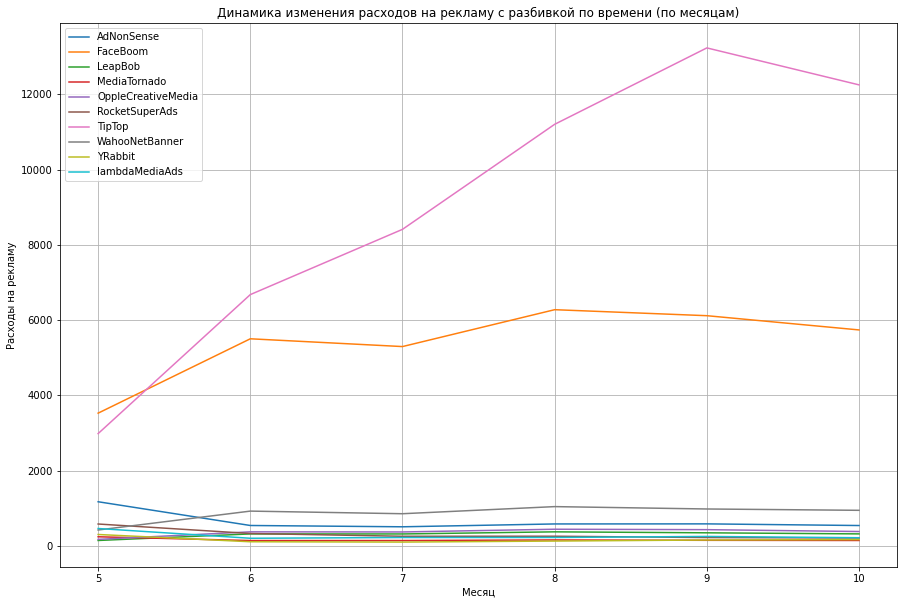

In [26]:
#выделяем месяц из столбца costs['dt']
costs['month'] = costs['dt'].dt.month
#строим график, где по оси х - месяцы, по оси y - сумма расходов, каждая линия - один рекламный источник 
costs_month = costs.pivot_table(index='month', columns='Channel', values='costs', aggfunc='sum')\
.plot(grid=True, figsize=(15,10))
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов на рекламу с разбивкой по времени (по месяцам)')
plt.show();     

**Выводы по п.4.4.:**

График динамики изменения расходов во времени по месяцам отражает такую же картину стабильного увеличения расходов на рекламу по каналам TipTop и FaceBoom до сентября 2019 года, с дальнейшим уменьшением вложений в рекламу. По остальным каналам вложения в рекламу остаются примерно на одном уровне в течение всего периода анализа.

### Определение средней стоимости привлечения одного пользователя (CAC) из каждого источника

In [27]:
#строим и выводим на экран сводную таблицу, сгруппированную по рекламным источникам и считающую среднее CAC
cac_mean = profiles.groupby('Channel').agg({'acquisition_cost' : 'mean'})\
.rename(columns={'acquisition_cost' : 'cac'}).sort_values(by='cac', ascending=False).reset_index()
display(round(cac_mean, 3))

,Channel,cac
0,TipTop,2.799
1,FaceBoom,1.113
2,AdNonSense,1.008
3,lambdaMediaAds,0.725
4,WahooNetBanner,0.602
5,RocketSuperAds,0.412
6,OppleCreativeMedia,0.250
7,YRabbit,0.219
8,MediaTornado,0.219
9,LeapBob,0.210


**Выводы по п.4.5.:**
    
 Наибольшая стоимость привлечения одного пользователя по рекламному источнику TipTop (2.799) и FaceBoom (1.113). Стоимость привлечения органических пользователей равна нулю.

**Общий вывод по п.4:**

Общая сумма расходов на маркетинг составила 105 497.30 руб. Исследование показало, что больше всего денежных средств потрачено на рекламный канал TipTop (54751.30 руб.) и FaceBoom (32445.60 руб.), что принесло свои результаты в виде большей доли платящих пользователей, пришедших из этих каналов. Меньше всего денежных средств потрачено на рекламные источники MediaTornado(954.48 руб.) и YRabbit(944.22 руб.).

График динамики изменения расходов во времени по неделям и месяцам отражает картину стабильного увеличения расходов на рекламу по каналам TipTop и FaceBoom с дальнейшим незначительным уменьшением вложений в рекламу. По остальным каналам вложения в рекламу остаются примерно на одном уровне в течение всего периода анализа.

Наибольшая стоимость привлечения одного пользователя по рекламному источнику TipTop (2.799) и FaceBoom (1.113). Стоимость привлечения органических пользователей равна нулю.

## Оценка окупаемости рекламы

### Анализ окупаемости рекламы с помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

In [28]:
# убираем из profiles органических пользователей
profiles_no_organic = profiles.loc[profiles['Channel'] != 'organic'].reset_index()

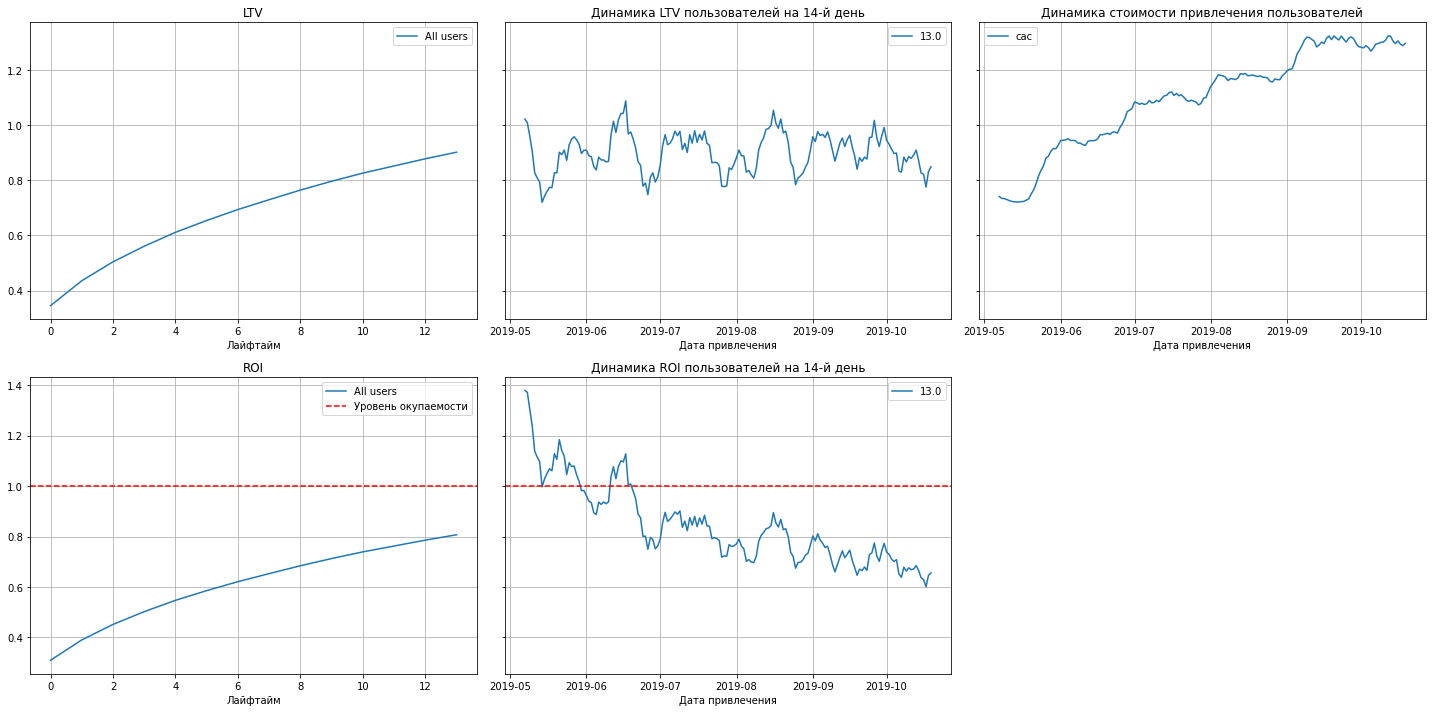

In [29]:
#устанавливаем момент анализа
observation_date = datetime(2019, 11, 1).date()
#устанавливаем горизонт анализа
horizon_days = 14

#считаем ltv и roi 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы по п.5.1.:**
    
 Анализ графиков LTV показал, что в целом по всем клиентам уровень LTV (общая сумма денег, которую все клиенты принесли компании в среднем) стабильно растет и к 14 дню после регистрации достигает уровня 0.9. Если же рассматривать LTV  в динамике, то можно отметить, что только по клиентам, привлеченных в мае 2019 года, LTV имеет более низкий уровень - 0.7, по клиентам же, привлеченным в последующие месяцы, LTV стабильно держится на среднем уровне 0.8 - 0.9.
 
 График динамики стоимости привлечения пользователей показал, что по клиентам, привлеченным в мае 2019 года, стоимость привлечения пользователей значительно ниже, чем по клиентам, привлеченным в последующие месяца. Начиная с клиентов, привлеченных в июне 2019 года, стоимость привлечения одного пользователя резко выросла (от 0.7 до 0.9). Видимо, в это время были сделаны значительные вливания в рекламу, и по клиентам, привлеченным в последующие месяцы, стоимость привлечения пользователей стабильно растет.
 
 Если же анализировать уровень окупаемости в целом по всем клиентам, то видно, что к 14 дню жизни клиенты так и не окупились. Но при этом график показывает стабильный уровень роста. 
 
 Если рассматривать динамику изменения ROI пользователей, то можно увидеть, что реклама окупалась только за счет клиентов, привлеченных в мае и частично в июне 2019 года. Причем самый высокий уровень окупаемости(почти 1.4) - у "майских" клиентов.  

### Анализ конверсии пользователей, динамики ее изменения

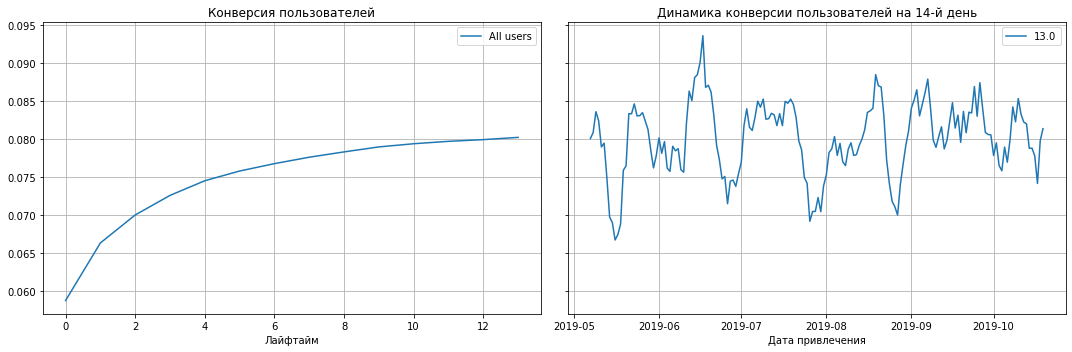

In [30]:
#считаем конверсию пользователей и ее динамику
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_no_organic, orders, observation_date, horizon_days)
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы по п.5.2.:**

Анализ графика конверсии пользователей показал, что конверсия пользователей на протяжении 14 дней стабильно растет. Если рассматривать динамику конверсии пользователей на 14 день, то наименьшая конверсия у клиентов, привлеченных в мае 2019 года, а наибольшая конверсия - у клиентов, привлеченных в июне 2019 года.   
    

### Анализ удержания пользователей и динамики ее изменения

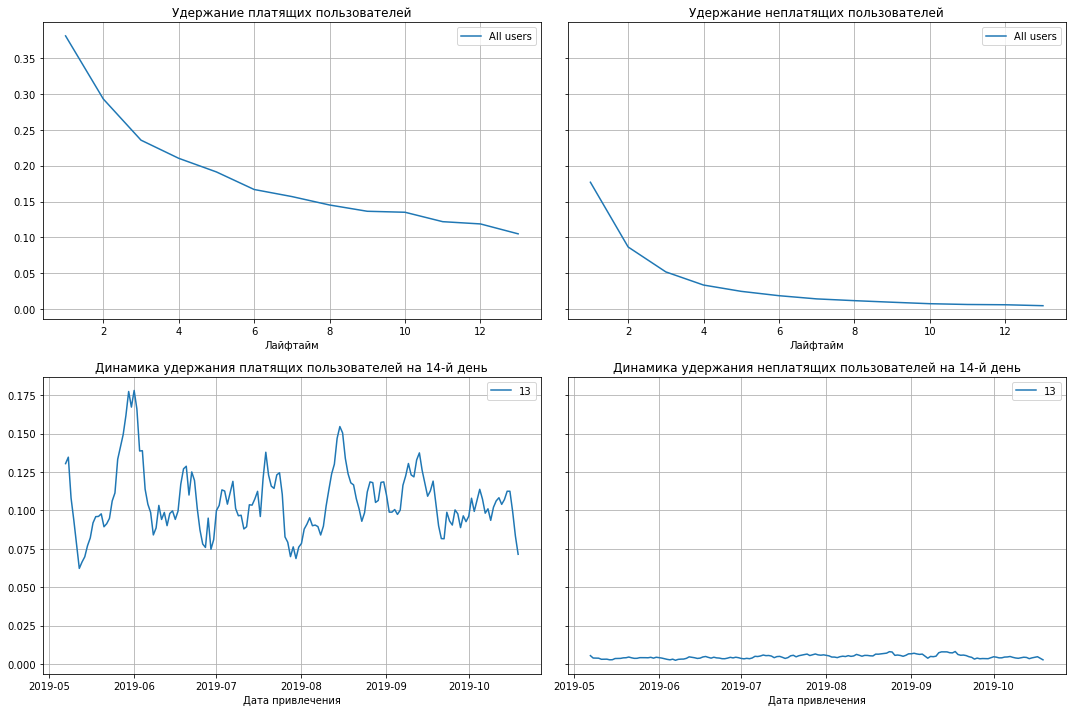

In [31]:
#считаем удержание пользователей и динамику ее изменения
retention_raw, retention, retention_history = get_retention(profiles_no_organic, visits, observation_date, horizon_days)
#строим графики
plot_retention(retention, retention_history, horizon_days)

**Выводы по п.5.3.:**

Анализ графиков удержания показал, что на протяжении 14 дней удержание и платящих, и неплатящих пользователей стабильно уменьшается. Но следует отметить, что удержание платящих пользователей падает не так сильно, даже к 14 дню удержание остается около 10%. В то время как удержание неплатящих пользователей к 14 дню уже стремится к нулю.

Анализ динамики платящих пользователей на 14 день показывает, что лучше всего удерживались пользователи, привлеченные в последних числах мая и начале июня, а также в середине августа. Хуже всего удерживались пользователи, привлеченные в конце мая, конце августа и конце октября. Что касается динамики неплатящих пользователей, то она стабильно на уровне около нуля для клиентов, привлеченных за весь период анализа.

### Анализ окупаемости рекламы с разбивкой по устройствам

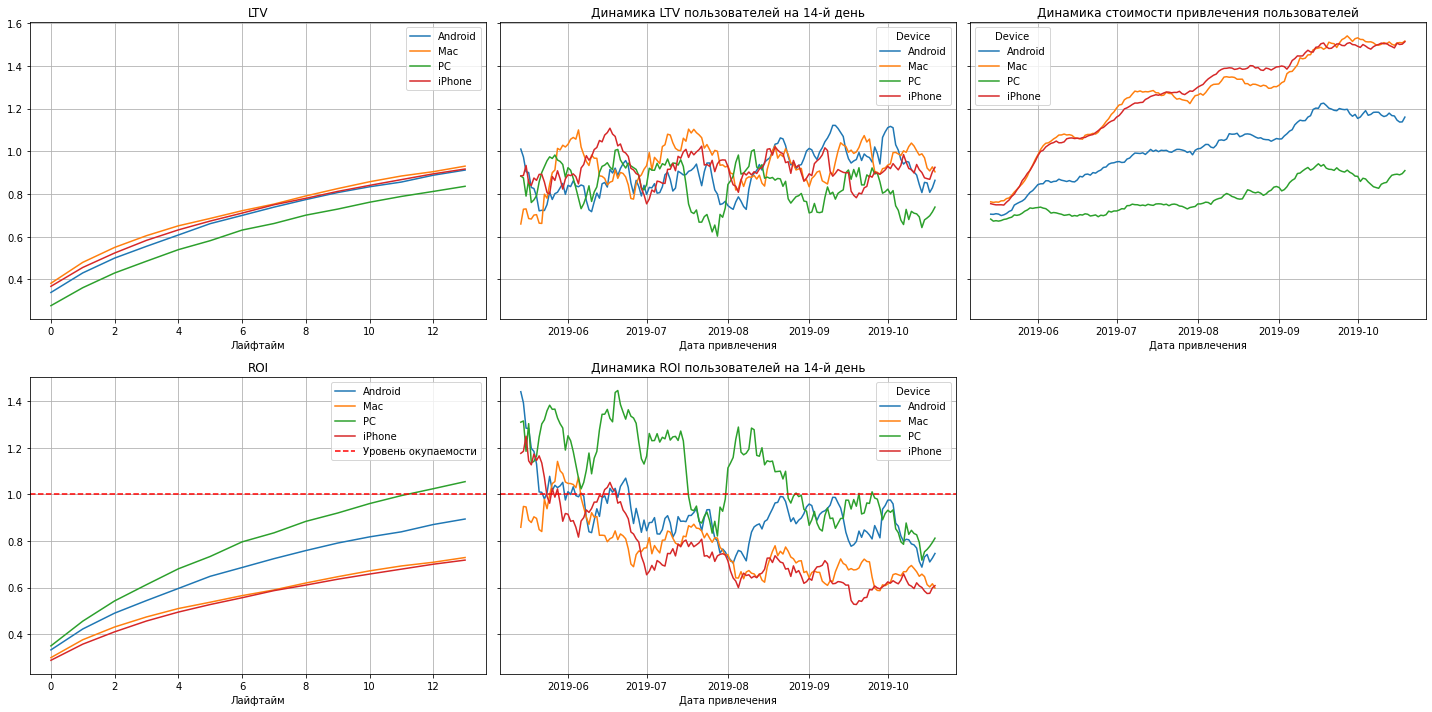

In [32]:
#смотрим окупаемость с разбивкой по устройствам
dimensions = ['Device']

#считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы по п.5.4.:**

LTV стабильно растет по пользователям со всеми видами устройств. Стоимость привлечения также стабильно растет по всем видам устройств, при этом выше всего стоимость привлечения пользователей с устройствами Mac и iPhone.

По устройствам PC реклама начинает окупаться только для пользователей, проживших в компании более 10 дней. По остальным устройствам (Android, Mac и iPhone) реклама совсем не окупается. При этом следует отметить, что для всех устройств, кроме PC, лучше всего окупается реклама по пользователям, привлеченным в мае, июне 2019 года. Динамика ROI по устройству PC  окупается практически для всех пользователей, привлеченных до сентября 2019 года.   

### Анализ окупаемости рекламы с разбивкой по странам

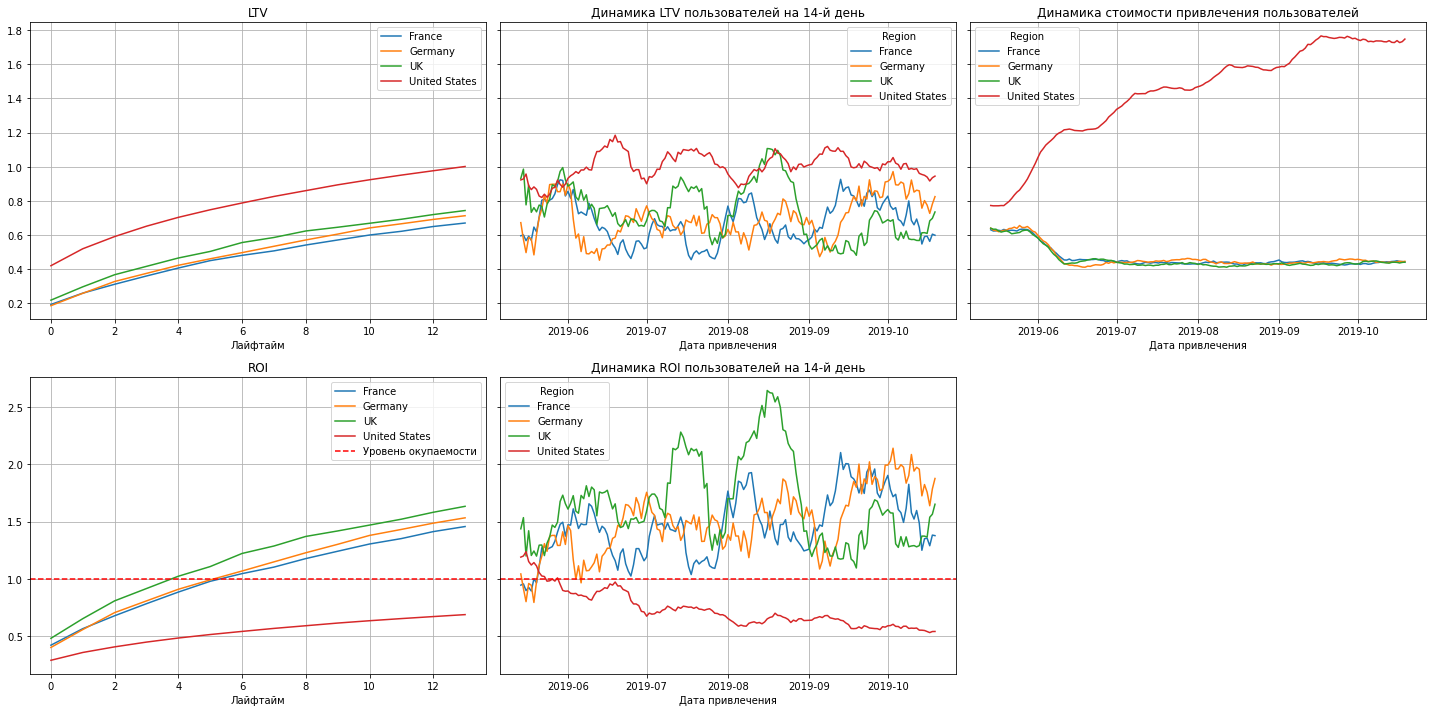

In [33]:
#смотрим окупаемость с разбивкой по странам
dimensions = ['Region']

#считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы по п.5.5.:**

LTV на протяжении всех 14 дней показывает стабильный рост по всем странам. Самый высокий LTV  у пользователей из США. LTV в разных странах подвержен сезонности (например, в США скачок в июне 209 года, в Великобритании скачок вверх в июле, августе 2019 года), но в целом тоже стабилен. 

Стоимость привлечения пользователей стабильно растет для США, по другим же странам, после скачка вниз в июне 2019 года, стабильна и одинакова для всех стран.

Реклама совсем не окупается в США, динамика ROI пользователей это подтверждает (окупались только клиенты в мае, затем резкий спад). По остальным же странам окупаемость стабильно растет. Выше всего окупаемость в Великобритании, которая даже несмотря на сезонность, показывает стабильный рост.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

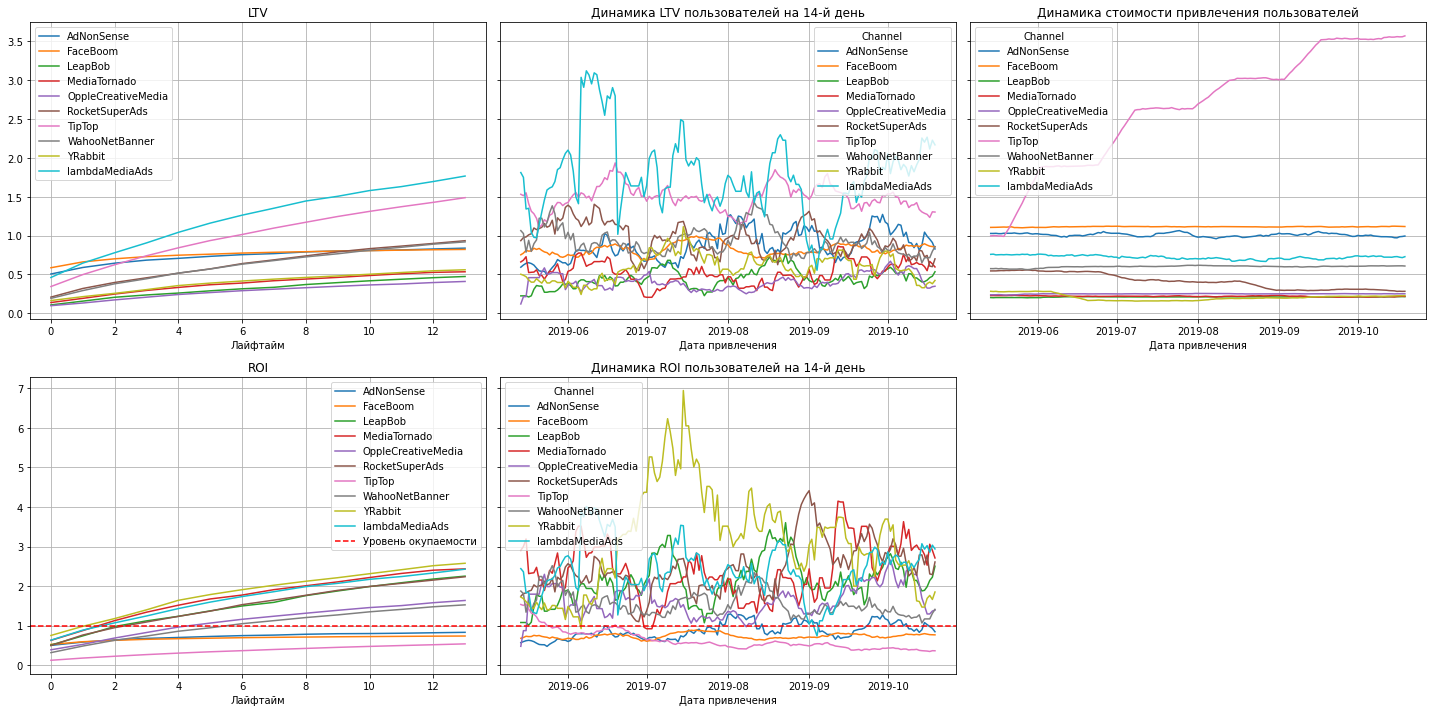

In [34]:
#смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['Channel']

#считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы по п.5.6.:**
    
 LTV в разбивке по рекламным источникам в целом стабильно растет. Лучше всего растет LTV по каналам LambdaMediaAds и TipTop. По остальным каналам рост более слабый. Следует отметить, что по каналу LambdaMediaAds динамика LTV подвержена особо сильной сезонности-волнообразности.
 
 Что касается динамики стоимости привлечения пользователей, то только по каналу TipTop стоимость сильно растет. По остальным каналам она стабильна для всех пользователей, привлеченных в период анализа.
 
 Совсем не окупаются каналы TipTop, FaceBoom, AdNonSense. По остальным каналам окупаемость стабильно растет.

**Общий вывод по пункту 5:**
    
На основании проведенного анализа можно сделать вывод о том, в целом реклама, направленная на привлечение пользователей, не окупается на момент анализа. 

Возможные причины неокупаемости рекламы, вероятно, кроются в слишком высокой стоимости привлечения клиентов для некоторых каналов, стран и устройств, а также низком LTV по ряду каналов.

На основании этого можно дать следующие **рекомендации по повышению эффективности привлечения пользователей для отдела маркетинга:**

В частности, рекламный канал TipTop имеет очень высокую стоимость привлечения пользователей, и при этом стабильный рост LTV. Возможно, следует уменьшить бюджет на рекламу по этому каналу до более низкого уровня и посмотреть, как это повлияет на окупаемость этого канала. 

Каналы же FaceBoom и AdNonSense имеют низкий LTV, что также ведет к проблемам окупаемости. В данном случае стоит провести кампанию по повышению лояльности клиентов, чтобы увеличить LTV. Например, это могут быть:
- подарки клиентам за регулярные покупки в приложении,
- улучшение сервиса для клиентов, в т.ч. техническая доступность приложения, удобство использования приложения, отсутствие ошибок при работе приложения.
- быть на связи с клиентами, учитывать их предложения, оперативно реагировать на жалобы.
Если же меры по повышению LTV не помогут улучшить ситуацию по этим каналам, то стоит отказаться от их использования.

Чтобы увеличить окупаемость рекламы, стоит сосредоточиться на эффективных каналах привлечения. Например, по каналу LambdaMediaAds можно увеличить долю бюджета на рекламу.

Следует отметить, что в США очень высокая стоимость привлечения пользователей. Нужно проанализировать, не закупается ли траффик в слишком дорогих источниках.

По видам устройств отмечается очень высокая стоимость привлечения пользователей по устройствам Mac и iPhone, при высоком LTV. В данной ситуации также стоит оптимизировать бюджет на рекламу, проанализировать стоимость траффика, провести анализ слабых мест рекламной кампании.

## Общий вывод по проекту

   
 Предобработка данных показала, что в датасетах нет дубликатов и пропущенных значений, но столбцы, содержащие дату и время, имеют тип данных object. Поскольку это затруднит дальнейшее проведение анализа, столбцы Session Start, Session End, Event Dt, dt преобразованы в формат даты и времени.

Анализ показал, что пользователи приходят в приложение из следующих стран: США, Великобритания, Франция и Германия. При этом количество пользователей из США значительно превышает количество пользователей из других стран (100002 чел.).
И доля платящих пользователей из США больше, чем из других стран (0.069). 

Анализ показал, что пользователи приложения пользуются устройствами iPhone, Android, PC, Mac. При этом количество пользователей с устройствами iPhone наибольшее (54479 чел.), наименьшее же количество пользователей с устройствами Mac (30042 чел.).
Но следует отметить, что доля платящих пользователей больше у использующих устройства Mac(0.064). При этом частота использования iPhone у платящих пользователей тоже высока (0.062).   

Анализ рекламных источников привлечения показал, что больше всего пользователей являются органическими, то есть пришли в приложение самостоятельно, не используя никакие рекламные источники (56439 чел.). Также достаточно много пользователей пришли из источников FaceBoom (29144 чел.) и TipTop(19561 чел.).
Что касается платящих пользователей,то чаще всего они приходили через канал FaceBoom (0.122) и AdNonSense (0.113).

Исследование показало, что больше всего денежных средств потрачено на рекламный канал TipTop (54751.30 руб.) и FaceBoom (32445.60 руб.), что принесло свои результаты в виде большей доли платящих пользователей, пришедших из этих каналов. 
Наибольшая стоимость привлечения одного пользователя по рекламному источнику TipTop (2.799) и FaceBoom (1.113). Стоимость привлечения органических пользователей равна нулю.


На основании проведенного анализа можно сделать вывод о том, в целом реклама, направленная на привлечение пользователей, не окупается на момент анализа. 

Возможные причины неокупаемости рекламы, вероятно, кроются в слишком высокой стоимости привлечения клиентов для некоторых каналов, стран и устройств, а также низком LTV по ряду каналов. 

На основании этого можно дать следующие **рекомендации по повышению эффективности привлечения пользователей для отдела маркетинга:**

В частности, рекламный канал TipTop имеет очень высокую стоимость привлечения пользователей, и при этом стабильный рост LTV. Возможно, следует уменьшить бюджет на рекламу по этому каналу до более низкого уровня и посмотреть, как это повлияет на окупаемость этого канала. 

Каналы же FaceBoom и AdNonSense имеют низкий LTV, что также ведет к проблемам окупаемости. В данном случае стоит провести кампанию по повышению лояльности клиентов, чтобы увеличить LTV. Например, это могут быть:
- подарки клиентам за регулярные покупки в приложении,
- улучшение сервиса для клиентов, в т.ч. техническая доступность приложения, удобство использования приложения, отсутствие ошибок при работе приложения.
- быть на связи с клиентами, учитывать их предложения, оперативно реагировать на жалобы.

Чтобы увеличить окупаемость рекламы, стоит сосредоточиться на эффективных каналах привлечения. Например, по каналу LambdaMediaAds можно увеличить долю бюджета на рекламу.

Следует отметить, что в США очень высокая стоимость привлечения пользователей. Нужно проанализировать, не закупается ли траффик в слишком дорогих источниках.

По видам устройств отмечается очень высокая стоимость привлечения пользователей по устройствам Mac и iPhone, при высоком LTV. В данной ситуации также стоит оптимизировать бюджет на рекламу, проанализировать стоимость траффика, провести анализ слабых мест рекламной кампании.